<div style="text-align:center;">
  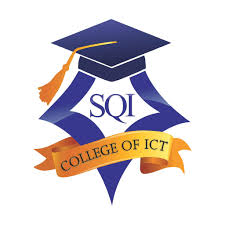

  <h1 style="color:#2c3e50; font-weight:bold; margin-top:10px;">
      SQI College of ICT
  </h1>

  <h2 style="color:#34495e; font-style:italic; margin-top:5px;">
      Data Science Level 5 - Data Visualization Project
  </h2>

  <h3 style="color:#d35400; margin-top:5px;">
      Project: Cafe + Reward + Offer
  </h3>
    
  <h2 style="color:blue; margin-top:5px;">
      Richie Mighty
  </h2>
  

</div>


<h1 style="color:darkblue; text-align:center; font-weight:bold;">
 Recommended Analysis
</h1>

How many reward offers were completed? Which offers had the highest completion rate?

How many informational offers were followed by transactions?

How are customer demographics distributed?

Are there any demographic patterns in offer completion?


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import ast


import warnings
warnings.filterwarnings("ignore")

/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers = pd.read_csv("customers.csv")
events = pd.read_csv("events.csv")
offers = pd.read_csv("offers.csv")

In [3]:
display(customers.head())
display(events.head())
display(offers.head())

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN


,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"


<h1 style="color:darkblue; text-align:center; font-weight:bold;">
DATA PREPROCESSING
</h1>

## Cleaning Event Table

In [4]:

# Step 1: Function to clean up "value"
def parse_value(val):
    # CASE 1: If it's a string like "{'offer id': 'abc123'}"
    if isinstance(val, str):
        try:
            # Turn the string into a real dictionary
            d = ast.literal_eval(val)
        except:
            # If it fails, just return an empty dictionary
            d = {}
    # CASE 2: If it's already a dictionary
    elif isinstance(val, dict):
        d = val
    # CASE 3: Anything else (like a number)
    else:
        d = {}

    # Now fix the keys: change spaces to underscores
    clean_dict = {}
    for k, v in d.items():
        new_key = k.replace(" ", "_")
        clean_dict[new_key] = v
    
    return clean_dict


In [5]:
# Step 2: Apply the cleaning function to each row
events["value"] = events["value"].apply(parse_value)

# Step 3: Expand the dictionaries into separate columns
expanded = events["value"].apply(pd.Series)

# Step 4: Merge back into original dataframe
events = pd.concat([events.drop(columns=["value"]), expanded], axis=1)

events

In [6]:
events.head()

In [7]:
# events["value"] = events["value"].apply(parse_value)

# # Expand the dictionary into new columns
# expanded = events["value"].apply(pd.Series)

# # Merge back with original df
# events = pd.concat([events.drop(columns=["value"]), expanded], axis=1)



In [8]:
events.tail(10)

In [9]:
print(customers.shape)
print(events.shape)
print(offers.shape)

## Data Merging

In [10]:
# Step 1: merge customers into events
cus_x_evt = events.merge(customers, on="customer_id", how="left")

# Step 2: merge offers into cus_x_evt
final_df = cus_x_evt.merge(offers, on="offer_id", how="left")


print("Events:", events.shape)
print("Customers:", customers.shape)
print("Offers:", offers.shape)
print("Final merged:", final_df.shape)

In [11]:
final_df.head()

### Preprocessing the 'Channel' column from the final_df

In [12]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# channels_df = pd.DataFrame(
#     mlb.fit_transform(final_df["channels"].apply(
#         lambda x: ast.literal_eval(x) if isinstance(x, str) else x
#     )),
#     columns=mlb.classes_,
#     index=final_df.index
# )

# # Merge back
# final_df = pd.concat([final_df, channels_df], axis=1)
# print(final_df.head(10))


In [13]:
final_df["channels"]

In [14]:
# Cleanning "channels" column into lists

channels_clean = []

for val in final_df["channels"]:
    
    if isinstance(val, str):              # if it's a string, turn it into a list
        channels_clean.append(ast.literal_eval(val))
        
    elif isinstance(val, list):           # already a list
        channels_clean.append(val)
        
    else:                                 # if it's NaN or something else
        channels_clean.append([])         # replace with empty list

final_df["channels"] = channels_clean

In [15]:
# Creating new columns for each possible channel

final_df["web"] = "No"
final_df["email"] = "No"
final_df["mobile"] = "No"
final_df["social"] = "No"

# Looping through rows to mark channels
for i in range(len(final_df)):
    row_channels = final_df.loc[i, "channels"]   # this is a list now
    
    if "web" in row_channels:
        final_df.loc[i, "web"] = "Yes"
    if "email" in row_channels:
        final_df.loc[i, "email"] = "Yes"
    if "mobile" in row_channels:
        final_df.loc[i, "mobile"] = "Yes"
    if "social" in row_channels:
        final_df.loc[i, "social"] = "Yes"

In [16]:
final_df.head()

## Data Cleaning

In [17]:
final_df.info()

In [18]:
pd.DataFrame([final_df.isnull().sum(), final_df.isnull().sum()/len(final_df)*100]).T

In [19]:
final_df.drop("reward_x", axis=1, inplace = True)

| Column                    | % Missing | Notes                                                                  |
| ------------------------- | --------- | ---------------------------------------------------------------------- |
| `customer_id`             | 0%        | Perfect.                                                  |
| `event`                   | 0%        | Clean.                                                                 |
| `time`                    | 0%        | Clean.                                                                 |
| `offer_id`                | **45%**   | Missing because not every event has an offer (transactions don’t).     |
| `amount`                  | **55%**   | Missing because only transactions have an amount.                      |
| `became_member_on`        | 0%        | Clean.                                                                 |
| `gender`                  | **11%**   | Some customers didn’t provide gender.                                  |
| `age`                     | 0%        | Looks clean, but where age = 118, sometimes i can be a placeholder. |
| `income`                  | **11%**   | Same customers missing gender likely also missing income.              |
| `offer_type`              | **45%**   | Same as `offer_id` – missing for transaction events.                   |
| `difficulty`              | **45%**   | Same reason.                                                           |
| `reward_y`                | **45%**   | Same reason.                                                           |
| `duration`                | **45%**   | Same reason.                                                           |
| `channels`                | 0%        | Clean.                                                                 |
| `web/email/mobile/social` | 0%        | Clean (after one-hot expansion).                                       |


In [25]:
final_df["age"] = final_df["age"].replace(118, np.nan)
final_df["gender"] = final_df["gender"].fillna("Unknown")
final_df["income"] = final_df["income"].fillna(final_df["income"].median())


final_df.head()

In [24]:
print(pd.DataFrame([final_df.isnull().sum(), final_df.isnull().sum()/len(final_df)*100]))


## ANALYSIS

In [64]:
# final_df.to_csv("Final Data.csv")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
final_df = pd.read_csv("Final Data.csv")
final_df.head()

,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,20170509,F,75.0,100000.0,bogo,5.0,5.0,7.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20170804,Unknown,NaN,62000.0,discount,20.0,5.0,10.0,"['web', 'email']",Yes,Yes,No,No
2,2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,20180426,M,68.0,70000.0,discount,10.0,2.0,7.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,20170925,Unknown,NaN,62000.0,discount,10.0,2.0,10.0,"['web', 'email', 'mobile', 'social']",Yes,Yes,Yes,Yes
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,20171002,Unknown,NaN,62000.0,bogo,10.0,10.0,5.0,"['web', 'email', 'mobile', 'social']",Yes,Yes,Yes,Yes


In [27]:

    # Filter informational offers
info_offers = final_df[final_df["offer_type"] == "informational"]

    # Merge with transactions by customer
transactions = final_df[final_df["event"] == "transaction"]

display(info_offers.head())
display(transactions.head())


,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
7,7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,NaN,20171111,M,58.0,51000.0,informational,0.0,0.0,4.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
13,13,c27e0d6ab72c455a8bb66d980963de60,offer received,0,3f207df678b143eea3cee63160fa8bed,NaN,20170616,F,78.0,71000.0,informational,0.0,0.0,4.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
31,31,be8a5d1981a2458d90b255ddc7e0d174,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20140527,M,39.0,51000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes
44,44,a5a6ef2b78a04ddc9f374dd7c7f60bff,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20151129,M,75.0,52000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes
53,53,6e04a90a0e074496b5f229eb1f553433,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20180110,M,27.0,35000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes


,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,0.83,20160711,F,20.0,30000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,34.56,20160117,M,42.0,96000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12659,12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,13.23,20171228,M,36.0,56000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,NaN,19.51,20171016,F,55.0,94000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,NaN,18.97,20171217,F,39.0,67000.0,NaN,NaN,NaN,NaN,[],No,No,No,No


In [39]:
# transactions['time']

In [89]:
info_offers['event'].value_counts()[:1]

event
offer received    15235
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Information Offers')

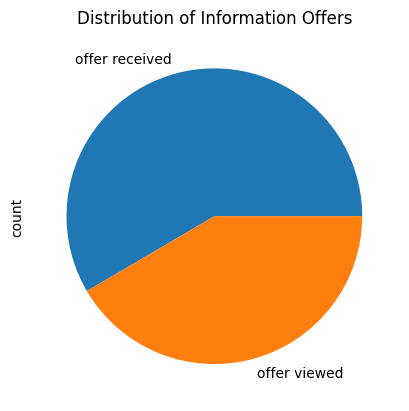

In [ ]:


info_offers['event'].value_counts().plot(kind="pie")
plt.title("Distribution of Information Offers")

In [32]:
    # For simplicity: count customers who got informational offer AND later transacted
info_with_txn = info_offers.merge(transactions, on="customer_id", suffixes=("_offer", "_txn"))


In [45]:
info_with_txn.columns

Index(['Unnamed: 0_offer', 'customer_id', 'event_offer', 'time_offer',
       'offer_id_offer', 'amount_offer', 'became_member_on_offer',
       'gender_offer', 'age_offer', 'income_offer', 'offer_type_offer',
       'difficulty_offer', 'reward_y_offer', 'duration_offer',
       'channels_offer', 'web_offer', 'email_offer', 'mobile_offer',
       'social_offer', 'Unnamed: 0_txn', 'event_txn', 'time_txn',
       'offer_id_txn', 'amount_txn', 'became_member_on_txn', 'gender_txn',
       'age_txn', 'income_txn', 'offer_type_txn', 'difficulty_txn',
       'reward_y_txn', 'duration_txn', 'channels_txn', 'web_txn', 'email_txn',
       'mobile_txn', 'social_txn'],
      dtype='object')

In [59]:
info_with_txn = info_with_txn[info_with_txn["time_txn"] > info_with_txn["time_offer"]]

print(f"Number of informational offers followed by transactions: {info_with_txn.shape[0]}")

Number of informational offers followed by transactions: 114190


In [60]:
info_with_txn["time_txn"]

0         216
1         378
2         456
3         570
4          18
         ... 
208638    708
208653    702
208658    702
208704    708
208833    708
Name: time_txn, Length: 114190, dtype: int64

In [61]:
info_by_txn = pd.DataFrame({"Customer ID": info_with_txn["customer_id"], "Recieved Time":info_with_txn["time_offer"], "transactions Time": info_with_txn["time_txn"]})
info_by_txn.tail(50)

,Customer ID,Recieved Time,transactions Time
207267,6be0513109fe4d738e2af7fb252fefb7,654,660
207279,e75780657f42498c8b16c915ad2fc209,654,678
207324,ff35495df493403388a7373862bcf2d5,654,666
207388,fabefc60ee364eabb634047a2d441e50,654,666
207411,70f8c587fcf9433b8ca366eaf480f814,654,666
207452,6bb9186fb03e4d99a4c7f10ce849c65b,654,666
207462,7e6d3a665910453b9d9fdfb0997fd0b5,654,672
207507,86b8f92aa604408994acf65809e10f7f,654,684
207517,7ce0945d275b42a3ac29da1bd24cea07,654,678
207536,db2f2fd8ecf2449b92149127d3d344f8,654,672


Text(0, 0.5, 'Number of Customers')

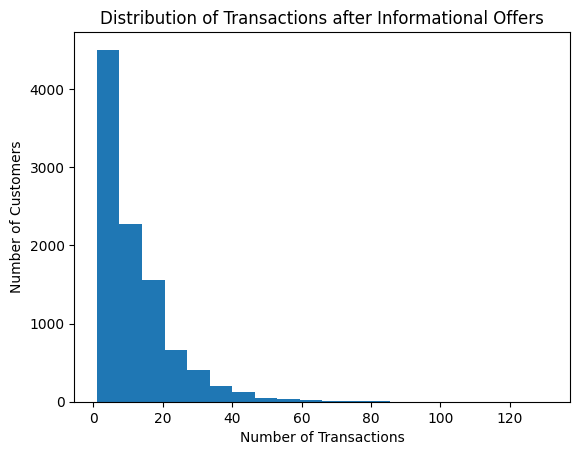

In [65]:
# Count how many times each customer transacted after an informational offer
txn_counts = info_with_txn.groupby("customer_id")["time_txn"].count()

fig, ax = plt.subplots()
txn_counts.plot(kind="hist", bins=20, ax=ax)
ax.set_title("Distribution of Transactions after Informational Offers")
ax.set_xlabel("Number of Transactions")
ax.set_ylabel("Number of Customers")



/var/folders/mm/sx65w_3d5ksbql07159nq28w0000gn/T/ipykernel_13654/3669623054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_with_txn["delay_hours"] = info_with_txn["time_txn"] - info_with_txn["time_offer"]


Text(0, 0.5, 'Number of Transactions')

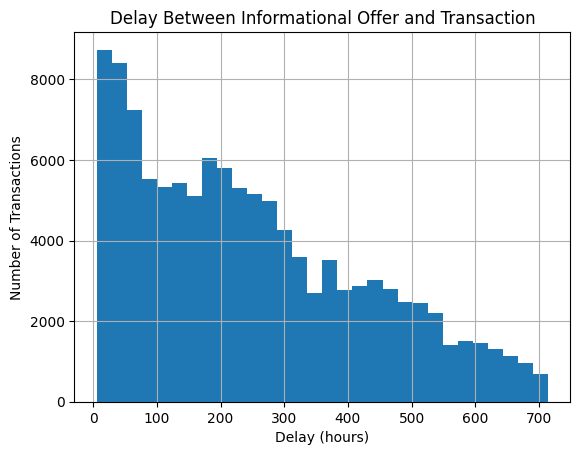

In [67]:
# Calculate the delay in hours between offer received and transaction
info_with_txn["delay_hours"] = info_with_txn["time_txn"] - info_with_txn["time_offer"]

fig, ax = plt.subplots()
info_with_txn["delay_hours"].hist(bins=30, ax=ax)
ax.set_title("Delay Between Informational Offer and Transaction")
ax.set_xlabel("Delay (hours)")
ax.set_ylabel("Number of Transactions")



In [ ]:

]

Text(0.5, 1.0, 'Informational Offers Followed by Transactions')

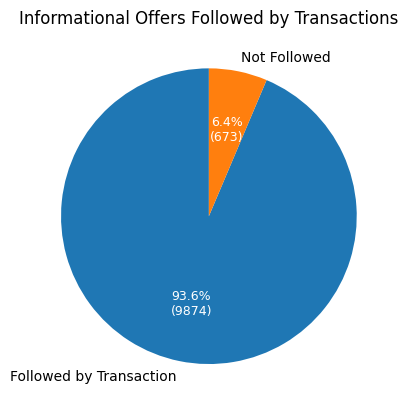

In [73]:
# Total informational offers
total_info_offers = info_offers["customer_id"].nunique()

# Customers who transacted after receiving an informational offer
followed_txn = info_with_txn["customer_id"].nunique()

# Customers who didn’t transact after receiving informational offers
not_followed = total_info_offers - followed_txn

# Plot pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    [followed_txn, not_followed],
    labels=["Followed by Transaction", "Not Followed"],
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100*total_info_offers))})",  # % and count
    startangle=90
)

# Style labels
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color("white")

ax.set_title("Informational Offers Followed by Transactions")


In [93]:
    # Filter informational offers
info_offers = final_df[final_df["offer_type"] == "informational"]
display(info_offers.head(5))

# Merge with transactions by customer
transactions = final_df[final_df["event"] == "transaction"]
display(transactions.head(5))

,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
7,7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,NaN,20171111,M,58.0,51000.0,informational,0.0,0.0,4.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
13,13,c27e0d6ab72c455a8bb66d980963de60,offer received,0,3f207df678b143eea3cee63160fa8bed,NaN,20170616,F,78.0,71000.0,informational,0.0,0.0,4.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
31,31,be8a5d1981a2458d90b255ddc7e0d174,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20140527,M,39.0,51000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes
44,44,a5a6ef2b78a04ddc9f374dd7c7f60bff,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20151129,M,75.0,52000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes
53,53,6e04a90a0e074496b5f229eb1f553433,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,20180110,M,27.0,35000.0,informational,0.0,0.0,3.0,"['email', 'mobile', 'social']",No,Yes,Yes,Yes


,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,0.83,20160711,F,20.0,30000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,34.56,20160117,M,42.0,96000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12659,12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,13.23,20171228,M,36.0,56000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,NaN,19.51,20171016,F,55.0,94000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,NaN,18.97,20171217,F,39.0,67000.0,NaN,NaN,NaN,NaN,[],No,No,No,No
